In [2]:
import sqlalchemy as db
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from database.config import *

engine = create_engine(f'postgresql://{DB_USER}@{DB_HOST}:{DB_PORT}/{DB_NAME}')
# Session = sessionmaker(bind=engine) 

connection = engine.connect()
metadata = db.MetaData()
scores = db.Table('scores', metadata, autoload=True, autoload_with=engine)
#Equivalent to 'SELECT * FROM census'
query = db.select([scores]) 
scores_list = connection.execute(query).fetchall()


# print(scores_list)

scores_columns = ["Name", "Golfer 1", "Golfer 2", "Golfer 3", "Score", "Predicted Score"]
df = pd.DataFrame(data=scores_list, columns=scores_columns)

# df.head()

df["Difference"] = df["Score"].max()-df["Score"]

<AxesSubplot:ylabel='Name'>

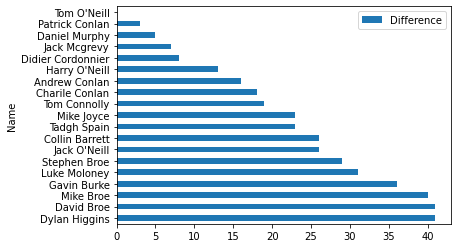

In [3]:
df.plot.barh(x='Name', y='Difference')

In [6]:
round_scores = db.Table('round_scores', metadata, autoload=True, autoload_with=engine)
#Equivalent to 'SELECT * FROM census'
query = db.select([round_scores]) 
round_scores_list = connection.execute(query).fetchall()


round_scores_columns = ["gent", "total_r1", "total_r2", "total_r3", "total_r4", "diff", "predicted_score"]
df = pd.DataFrame(data=round_scores_list, columns=round_scores_columns)

df['rank'] = df.reset_index().index + 1

df["total_r0"]=0

Text(0.5, 1.0, 'Scores by Day')

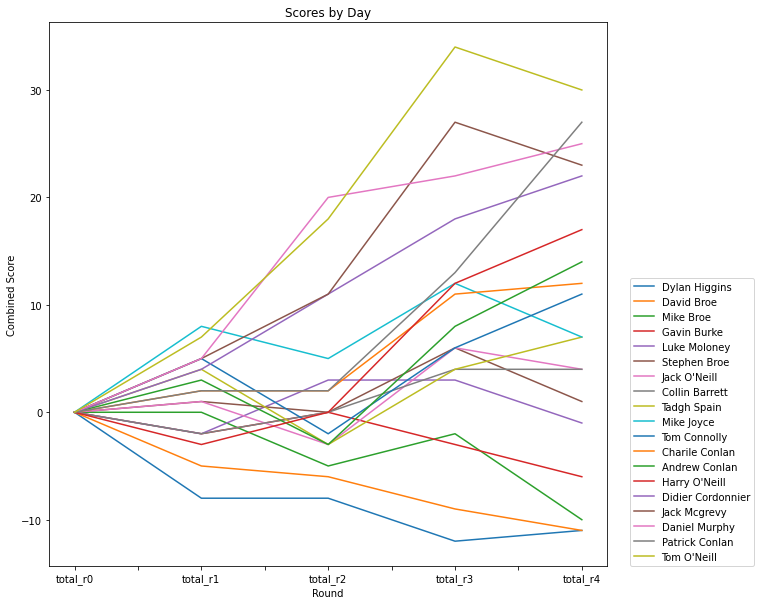

In [17]:
totals_columns = ["total_r0","total_r1", "total_r2", "total_r3", "total_r4"]


fig, ax = plt.subplots(figsize=(10,10))

df[totals_columns].T.plot.line(ax=ax)
names = df['gent'].to_list()
ax.legend(names, loc=(1.04,0))
ax.set_xlabel('Round')
ax.set_ylabel('Combined Score')
ax.set_title('Scores by Day')

In [8]:
df

,gent,total_r1,total_r2,total_r3,total_r4,diff,predicted_score,rank,total_r0
0,Dylan Higgins,-8,-8,-12,-11,0,-11,1,0
1,David Broe,-5,-6,-9,-11,2,-13,2,0
2,Mike Broe,0,-5,-2,-10,7,-18,3,0
3,Gavin Burke,-2,0,-3,-6,1,-12,4,0
4,Luke Moloney,-2,3,3,-1,2,-9,5,0
5,Stephen Broe,1,0,6,1,1,-12,6,0
6,Jack O'Neill,1,-3,6,4,1,-12,7,0
7,Collin Barrett,-2,0,4,4,3,-14,8,0
8,Tadgh Spain,4,-3,4,7,2,-13,9,0
9,Mike Joyce,8,5,12,7,3,-14,10,0


In [9]:
df['r1_diff'] = (df['predicted_score']-df['total_r1'].min()).abs()
df['r2_diff'] = (df['predicted_score']-df['total_r2'].min()).abs()
df['r3_diff'] = (df['predicted_score']-df['total_r3'].min()).abs()
df['r4_diff'] = (df['predicted_score']-df['total_r4'].min()).abs()

In [10]:
df

,gent,total_r1,total_r2,total_r3,total_r4,diff,predicted_score,rank,total_r0,r1_diff,r2_diff,r3_diff,r4_diff
0,Dylan Higgins,-8,-8,-12,-11,0,-11,1,0,3,3,1,0
1,David Broe,-5,-6,-9,-11,2,-13,2,0,5,5,1,2
2,Mike Broe,0,-5,-2,-10,7,-18,3,0,10,10,6,7
3,Gavin Burke,-2,0,-3,-6,1,-12,4,0,4,4,0,1
4,Luke Moloney,-2,3,3,-1,2,-9,5,0,1,1,3,2
5,Stephen Broe,1,0,6,1,1,-12,6,0,4,4,0,1
6,Jack O'Neill,1,-3,6,4,1,-12,7,0,4,4,0,1
7,Collin Barrett,-2,0,4,4,3,-14,8,0,6,6,2,3
8,Tadgh Spain,4,-3,4,7,2,-13,9,0,5,5,1,2
9,Mike Joyce,8,5,12,7,3,-14,10,0,6,6,2,3


In [11]:
df["Rank1"] = df[
    ["total_r1","r1_diff"]
].apply(tuple,axis=1).rank(method='dense',ascending=True).astype(int)
df["Rank2"] = df[
    ["total_r2","r2_diff"]
].apply(tuple,axis=1).rank(method='dense',ascending=True).astype(int)
df["Rank3"] = df[
    ["total_r3","r3_diff"]
].apply(tuple,axis=1).rank(method='dense',ascending=True).astype(int)
df["Rank4"] = df[
    ["total_r4","r4_diff"]
].apply(tuple,axis=1).rank(method='dense',ascending=True).astype(int)

In [12]:
df

,gent,total_r1,total_r2,total_r3,total_r4,diff,predicted_score,rank,total_r0,r1_diff,r2_diff,r3_diff,r4_diff,Rank1,Rank2,Rank3,Rank4
0,Dylan Higgins,-8,-8,-12,-11,0,-11,1,0,3,3,1,0,1,1,1,1
1,David Broe,-5,-6,-9,-11,2,-13,2,0,5,5,1,2,2,2,2,2
2,Mike Broe,0,-5,-2,-10,7,-18,3,0,10,10,6,7,7,3,4,3
3,Gavin Burke,-2,0,-3,-6,1,-12,4,0,4,4,0,1,5,8,3,4
4,Luke Moloney,-2,3,3,-1,2,-9,5,0,1,1,3,2,4,12,5,5
5,Stephen Broe,1,0,6,1,1,-12,6,0,4,4,0,1,8,8,8,6
6,Jack O'Neill,1,-3,6,4,1,-12,7,0,4,4,0,1,8,5,8,7
7,Collin Barrett,-2,0,4,4,3,-14,8,0,6,6,2,3,6,9,7,8
8,Tadgh Spain,4,-3,4,7,2,-13,9,0,5,5,1,2,13,6,6,9
9,Mike Joyce,8,5,12,7,3,-14,10,0,6,6,2,3,16,13,11,10


[-0.5  0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5]


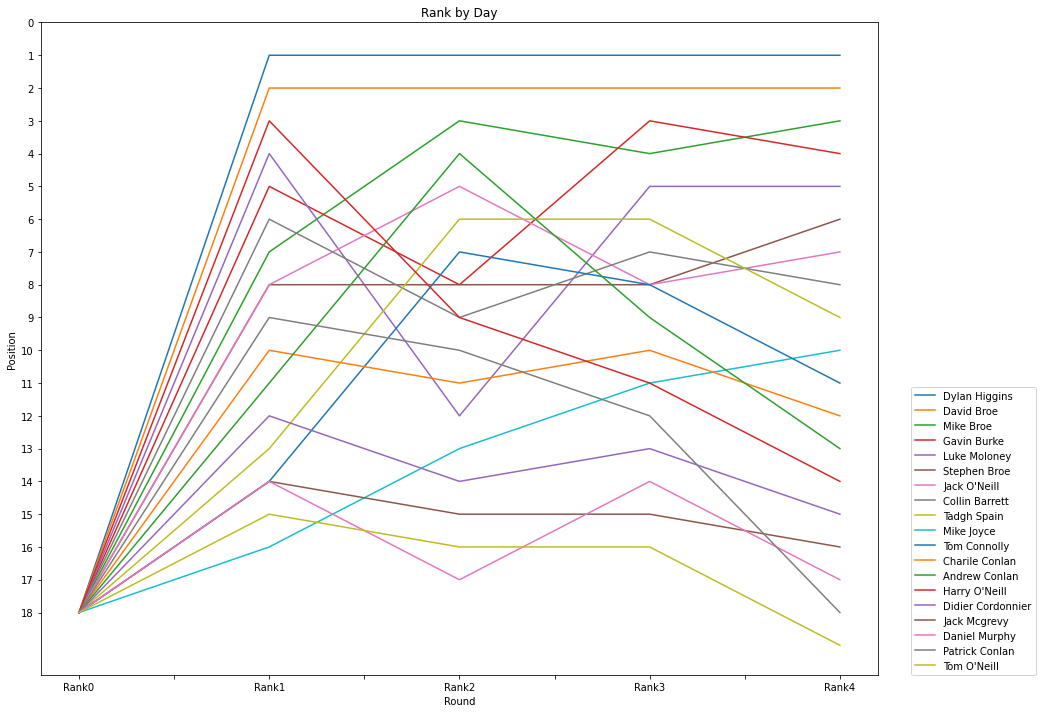

In [14]:
df["Rank0"]=18

rank_cols = [
    "Rank0",
    "Rank1",
    "Rank2",
    "Rank3",
    "Rank4"
]

fig, ax = plt.subplots(figsize=(15,12))

df[rank_cols].T.plot.line(ax=ax)
names = df['gent'].to_list()
ax.legend(names, loc=(1.04,0))
ax.set_xlabel('Round')
ax.set_ylabel('Position')
ax.set_title('Rank by Day')
# ax.set_xticks(["Day 1","Day 2","Day 3","Day 4"])
# ax.set_xticklabels(["Day 1","Day 2","Day 3","Day 4"])
print(ax.get_xticks())
ax.set_yticks(np.arange(len(df['gent'])))
ax.set_yticklabels(np.arange(len(df['gent'])))
ax.invert_yaxis()
# df[rank_cols]

In [93]:
df[rank_cols].T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
Rank1,1,2,7,5,4,8,8,6,13,16,14,10,11,3,12,14,14,9,15
Rank2,1,2,3,8,12,8,5,9,6,13,7,11,4,9,14,15,17,10,16
Rank3,1,2,4,3,5,8,8,7,6,11,8,10,9,11,13,15,14,12,16
Rank4,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19


In [ ]:
# TODO
# Andy horse race idea for scores
# manim?
# Use profile pictures 